In [1]:
import pandas as pd
import plotly.express as px

from common.storage import load_cleansed_df
from common.entity import SITEMAP

In [2]:
cleansed_df = load_cleansed_df(SITEMAP, ['load_timestamp', 'job_id'])
cleansed_df

,load_timestamp,job_id
0,2021-10-09 22:00:00+00:00,7506917
1,2021-10-09 22:00:00+00:00,7506673
2,2021-10-09 22:00:00+00:00,7466965
3,2021-10-09 22:00:00+00:00,7305531
4,2021-10-09 22:00:00+00:00,7384538
...,...,...
45678696,2022-09-27 00:00:00+00:00,8465891
45678697,2022-09-27 00:00:00+00:00,8467529
45678698,2022-09-27 00:00:00+00:00,8304838
45678699,2022-09-27 00:00:00+00:00,8297255


In [3]:
df = cleansed_df.copy()
df = df.rename(columns={'load_timestamp': 'online_at'})
df['online_at'] = pd.to_datetime(df['online_at']).dt.date
df = df['online_at'].value_counts()
df = df.reset_index()
df.columns = ['Date', 'Jobs']
df = df.sort_values(by='Date')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Jobs
326,2021-10-09,113858
344,2021-10-10,111325
342,2021-10-11,111745
321,2021-10-12,114141
295,2021-10-13,116319
...,...,...
4,2022-09-23,145815
10,2022-09-24,143905
26,2022-09-25,141403
27,2022-09-26,141391


## Number of jobs online (7-day rolling average)

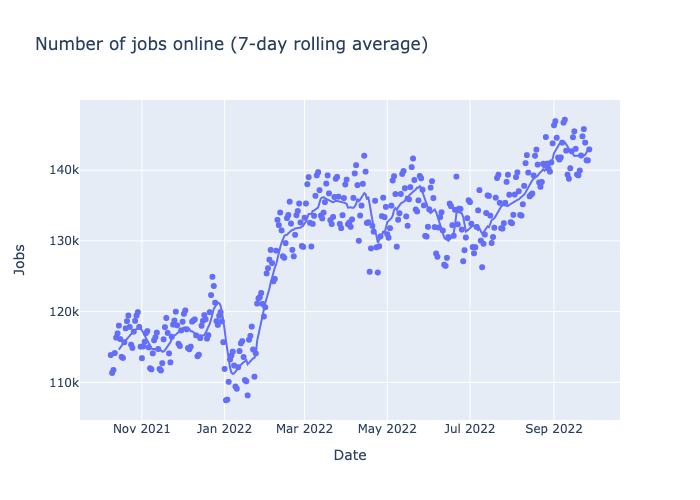

In [4]:
fig = px.scatter(df, x='Date', y='Jobs', trendline='rolling', trendline_options=dict(window=7),
                 title='Number of jobs online (7-day rolling average)')
fig.show('png')

In [5]:
df = cleansed_df.copy()
df = df.rename(columns={'load_timestamp': 'online_at'})
df['online_at'] = pd.to_datetime(df['online_at']).dt.date
df = df[df['online_at'] != df['online_at'].min()]
df = df[df['online_at'] != df['online_at'].max()]
df = df['job_id'].value_counts()
df = df.reset_index()
df.columns = ['job_id', 'Duration']
df

,job_id,Duration
0,7544267,352
1,7570600,352
2,7597004,352
3,7181013,352
4,3883884,352
...,...,...
1061014,7997316,1
1061015,7997072,1
1061016,7997033,1
1061017,7997052,1


## Number of days a job offer is online

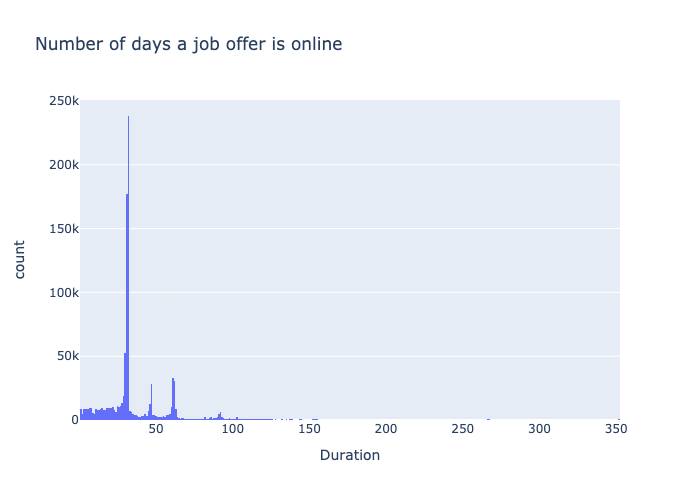

In [6]:

fig = px.histogram(df, x="Duration", title='Number of days a job offer is online')
fig.show("png")
